In [33]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000) # to keeep the the first frequent 10000 if not we will work with 88,585

In [34]:
print("trainning example",train_data[0])
print("trainning label example",train_labels[0])

trainning example [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
trainning label example 1


to prepare the data we can use 2 diferent approaches <p><p/>
1- to make the data in a tensor shape with (sampels, max_length), and padd words which has length less than the max and start model with embedding layer
 <p><p/>
2- multi-hot encode your list 
 <p><p/>
i will go with the later solution

In [35]:
import numpy as np

def multi_hot_encoding(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) # intialze a all zero matrix and later add ones for exixtng numbers

    for i,sequence in enumerate(sequences): # loop in sequences for a specfic sequence
        for j in sequence:  # loop on words insides a single sequence
            results[i,j] = 1. #change this words from zero to 1.0   
    return results
    

In [36]:
x_train = multi_hot_encoding(train_data)
x_test = multi_hot_encoding(test_data)

In [37]:
print("first elment of vectorized train data", x_train[0])
print("first elment of vectorized test data", x_test[0])

first elment of vectorized train data [0. 1. 1. ... 0. 0. 0.]
first elment of vectorized test data [0. 1. 1. ... 0. 0. 0.]


In [38]:
# turnning labels to floats since we are woring with floating operations

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [39]:
y_train[0]

np.float32(1.0)

# building model

In [40]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential(

    [
        layers.Dense(16,activation="relu"),
        layers.Dense(16,activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

In [41]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [42]:
# setting valdiation data

x_val =x_train[:10000]
y_val = y_train[:10000]

x_part_train = x_train[10000:]
y_part_train = y_train[10000:]

In [43]:
history = model.fit(
    x_part_train,y_part_train,
    epochs=20,
    batch_size = 512,
    validation_data=(x_val,y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6800 - loss: 0.6250 - val_accuracy: 0.8545 - val_loss: 0.4403
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8811 - loss: 0.3901 - val_accuracy: 0.8669 - val_loss: 0.3587
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9102 - loss: 0.2908 - val_accuracy: 0.8897 - val_loss: 0.2981
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9296 - loss: 0.2254 - val_accuracy: 0.8895 - val_loss: 0.2840
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9434 - loss: 0.1840 - val_accuracy: 0.8841 - val_loss: 0.2906
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9489 - loss: 0.1622 - val_accuracy: 0.8869 - val_loss: 0.2815
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9564 - loss: 0.1392 - val_accuracy: 0.8887 - val_loss: 0.2864
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9694 - loss: 0.1135 - val_accuracy: 0.8861 - v

In [44]:
history_dic = history.history

In [45]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    """
    Plot the accuracy metrics over epochs using Matplotlib
    
    Parameters:
    -----------
    history : History object
        The history object returned from model.fit()
    """
    # Extract accuracy metrics
    train_acc = history.history['accuracy']
    epochs = range(1, len(train_acc) + 1)
    
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Plot training accuracy
    plt.plot(epochs, train_acc, 'b-o', label='Training Accuracy')
    
    # Plot validation accuracy if available
    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        plt.plot(epochs, val_acc, 'r--o', label='Validation Accuracy')
    
    # Add labels and title
    plt.title('Model Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Usage example:
# history = model.fit(...)
# plot_accuracy(history)

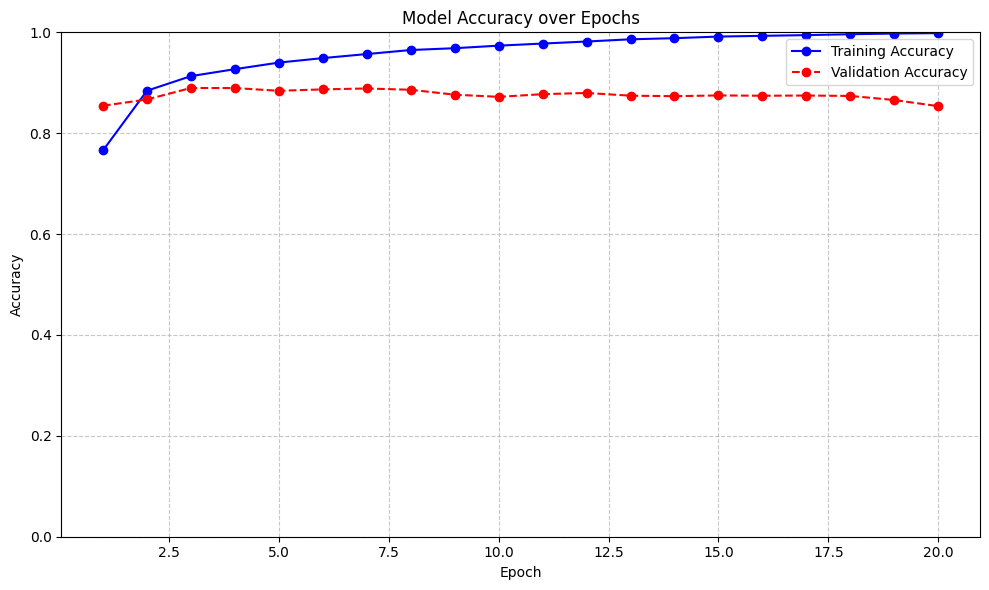

In [46]:
plot_accuracy(history)

In [47]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.01286223],
       [0.9999982 ],
       [0.21112518],
       ...,
       [0.00571813],
       [0.00429974],
       [0.8396269 ]], dtype=float32)